In [1]:
import pandas as pd 

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 

In [4]:
#join two datasets
df = pd.concat([X,y], axis="columns")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
df["pass"] = df.apply(lambda row: 1 if (row["G1"]+row["G2"]+row["G3"]) >= 35 else 0, axis=1)
df = df.drop(["G1","G2","G3"], axis=1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [6]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
pass           int64
dtype: object

In [7]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'pass'],
      dtype='object')

In [8]:
#one-hot encoding
df = pd.get_dummies(df, columns=['school', 'sex','address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian','schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic'], dtype='int') 

In [9]:
df.dtypes

age                  int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
pass                 int64
school_GP            int64
school_MS            int64
sex_F                int64
sex_M                int64
address_R            int64
address_U            int64
famsize_GT3          int64
famsize_LE3          int64
Pstatus_A            int64
Pstatus_T            int64
Mjob_at_home         int64
Mjob_health          int64
Mjob_other           int64
Mjob_services        int64
Mjob_teacher         int64
Fjob_at_home         int64
Fjob_health          int64
Fjob_other           int64
Fjob_services        int64
Fjob_teacher         int64
reason_course        int64
reason_home          int64
reason_other         int64
r

In [10]:
#preparing training and test data

#shuffle rows
df = df.sample(frac=1)
df_train = df[:500]
df_test = df[500:]

df_train_att = df_train.drop(["pass"], axis=1)
df_train_pass = df_train["pass"]

df_test_att = df_test.drop(["pass"], axis=1)
df_test_pass = df_test["pass"]

df_att = df.drop(["pass"], axis=1) 
df_pass = df["pass"]

In [11]:
#number of passing students in whole dataset
import numpy as np 
print("passing: %d out of %d (%.2f%%)" % (np.sum(df_pass), len(df_pass), 100*float(np.sum(df_pass)/len(df_pass))))  

passing: 328 out of 649 (50.54%)


In [12]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [13]:
#fit a decision tree 

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz 
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 5)
t = t.fit(df_train_att, df_train_pass)

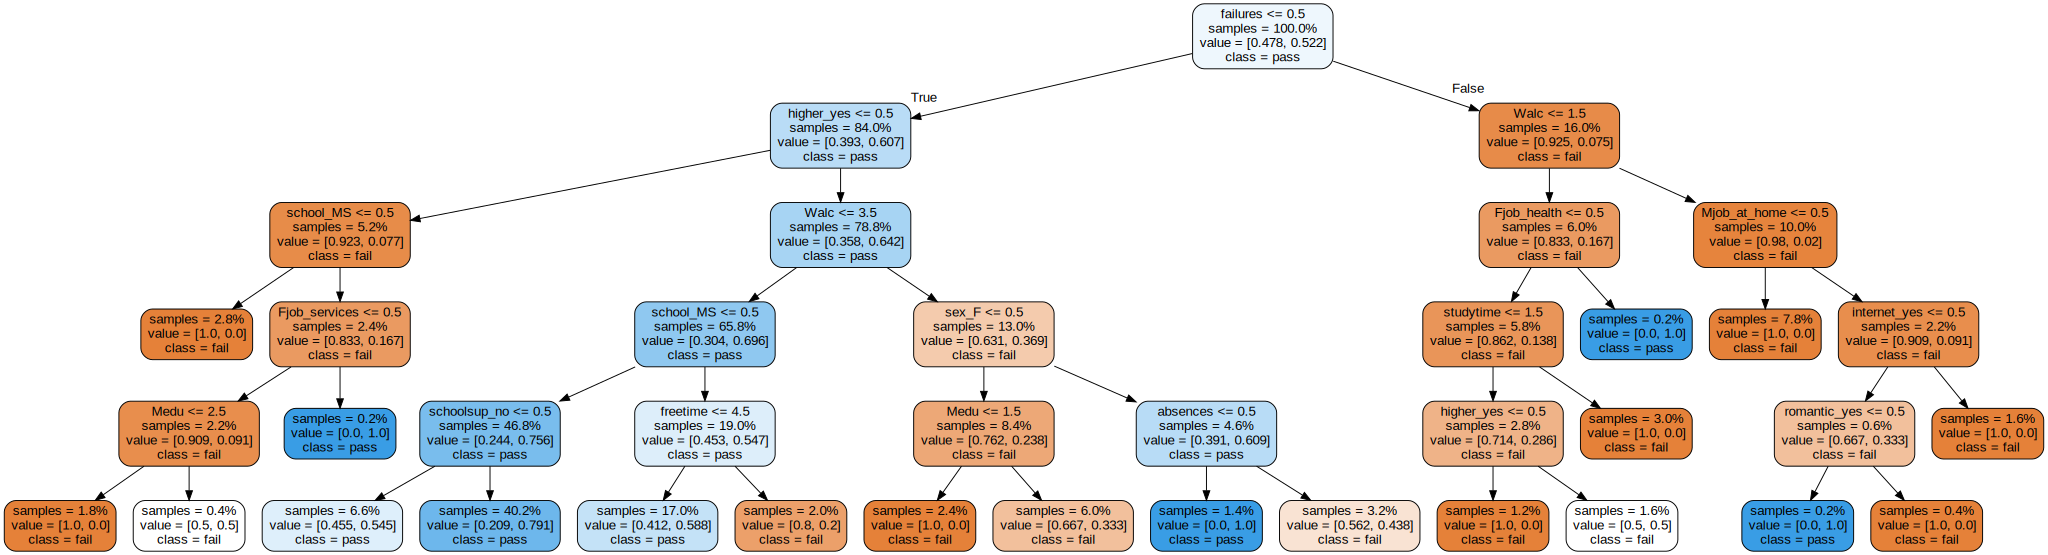

In [14]:
dot_data = tree.export_graphviz(t, out_file=None, label="all", impurity=False, proportion=True, feature_names=list(df_train_att), class_names=["fail","pass"], filled=True, rounded=True)
graph = graphviz.Source(dot_data)  
graph 

In [15]:
t.score(df_test_att, df_test_pass)

0.6241610738255033

In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(t, df_att, df_pass, cv=5)
#show average score +/- two standard deviations away (covering 95% of scores)
print("Accuracy %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy 0.68 (+/- 0.06)


In [18]:
#various choices to make regarding max_depth 
for max_depth in range(1,20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth = max_depth)
    scores = cross_val_score(t, df_att, df_pass, cv=5)
    print("Max depth %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std() * 2))

Max depth 1, Accuracy: 0.62 (+/- 0.02)
Max depth 2, Accuracy: 0.69 (+/- 0.09)
Max depth 3, Accuracy: 0.69 (+/- 0.09)
Max depth 4, Accuracy: 0.70 (+/- 0.08)
Max depth 5, Accuracy: 0.68 (+/- 0.07)
Max depth 6, Accuracy: 0.68 (+/- 0.06)
Max depth 7, Accuracy: 0.67 (+/- 0.07)
Max depth 8, Accuracy: 0.67 (+/- 0.08)
Max depth 9, Accuracy: 0.68 (+/- 0.10)
Max depth 10, Accuracy: 0.67 (+/- 0.10)
Max depth 11, Accuracy: 0.67 (+/- 0.06)
Max depth 12, Accuracy: 0.65 (+/- 0.08)
Max depth 13, Accuracy: 0.65 (+/- 0.10)
Max depth 14, Accuracy: 0.65 (+/- 0.10)
Max depth 15, Accuracy: 0.67 (+/- 0.13)
Max depth 16, Accuracy: 0.65 (+/- 0.10)
Max depth 17, Accuracy: 0.64 (+/- 0.10)
Max depth 18, Accuracy: 0.63 (+/- 0.11)
Max depth 19, Accuracy: 0.63 (+/- 0.12)


In [22]:
depth_acc = np.empty((19,3), float)
i=0
for max_depth in range(1,20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth = max_depth)
    scores = cross_val_score(t, df_att, df_pass, cv=5)
    depth_acc[i,0] = max_depth
    depth_acc[i,1] = scores.mean()
    depth_acc[i,2] = scores.std() * 2
    i += 1
depth_acc

array([[1.00000000e+00, 6.16350626e-01, 1.89314899e-02],
       [2.00000000e+00, 6.87227191e-01, 8.92587963e-02],
       [3.00000000e+00, 6.87203339e-01, 9.42199557e-02],
       [4.00000000e+00, 6.94943351e-01, 8.47619264e-02],
       [5.00000000e+00, 6.81073345e-01, 5.32147409e-02],
       [6.00000000e+00, 6.84126416e-01, 5.24346028e-02],
       [7.00000000e+00, 6.62599881e-01, 5.85910829e-02],
       [8.00000000e+00, 6.68789505e-01, 8.44400850e-02],
       [9.00000000e+00, 6.81132976e-01, 8.46446938e-02],
       [1.00000000e+01, 6.73392964e-01, 7.03927010e-02],
       [1.10000000e+01, 6.79558736e-01, 6.83281514e-02],
       [1.20000000e+01, 6.37996422e-01, 8.06000899e-02],
       [1.30000000e+01, 6.64162194e-01, 6.45311517e-02],
       [1.40000000e+01, 6.39582588e-01, 1.22006070e-01],
       [1.50000000e+01, 6.42599881e-01, 7.57785394e-02],
       [1.60000000e+01, 6.64197973e-01, 7.49255169e-02],
       [1.70000000e+01, 6.53440668e-01, 1.10138616e-01],
       [1.80000000e+01, 6.28753

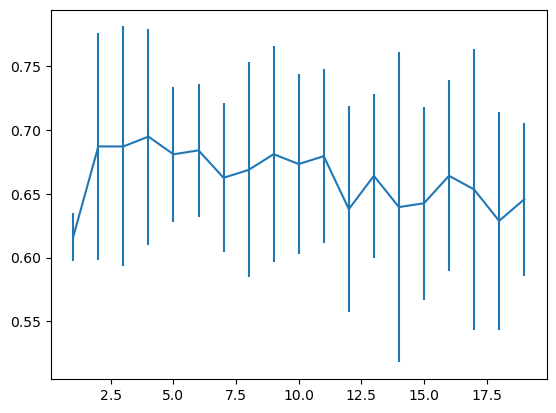

In [23]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])
plt.show()